In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vinzy_imgdata_importer import img_data_importer

In [2]:
X, y, m = img_data_importer("C:/Users/Rostaing/Downloads/cancer_du_sein")

Do you want to convert your image data to grey scale? y/n:  n
Do you want to resize your data? y/n [default:100x100]:  y
enter the size:  60


Generating, Shuffling & Mapping the Data...


Do you want to normalize your data? y/n [recommended]:  y
Do you want to save your data? y/n [will be saved using pickle]:  n


In [3]:
X.shape

(1578, 60, 60, 3)

In [4]:
y

[0,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,


In [5]:
m

{'benign': 0, 'malignant': 1, 'normal': 2}

In [6]:
y = np.array(y)
y

array([0, 1, 2, ..., 1, 1, 0])

In [7]:
classes = list(m)
classes

['benign', 'malignant', 'normal']

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

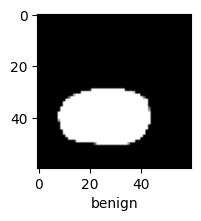

In [14]:
plot_sample(X, y, 0)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1262, 60, 60, 3), (316, 60, 60, 3), (1262,), (316,))

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(60, 60, 3)))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(3, activation="softmax"))

C:\Users\Rostaing\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=10, verbose=1, validation_data=(X_test, y_test))
model.summary()

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.4738 - loss: 0.9959 - val_accuracy: 0.5886 - val_loss: 0.9074
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5628 - loss: 0.8772 - val_accuracy: 0.6234 - val_loss: 0.8019
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6355 - loss: 0.7653 - val_accuracy: 0.6297 - val_loss: 0.7375
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7095 - loss: 0.6536 - val_accuracy: 0.7025 - val_loss: 0.6408
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7323 - loss: 0.5558 - val_accuracy: 0.6867 - val_loss: 0.6556
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7955 - loss: 0.4799 - val_accuracy: 0.7785 - val_loss: 0.5620
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8439 - loss: 0.3715 - val_accuracy: 0.7658 - val_loss: 0.6076
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8524 - loss: 0.3689 - val_accuracy: 0.7627 - v

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 60, 60, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         460,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,419,563 (5.42 MB)

 Trainable params: 473,187 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 946,376 (3.61 MB)

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(f"loss: {loss}")
print(f"accuracy: {acc}")

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]

In [ ]:
set(y_classes)

In [ ]:
plot_sample(X_test, y_classes, 6)

In [ ]:
plot_sample(X, y, 6)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(classification_report(y_test, y_classes))

In [ ]:
cn = confusion_matrix(y_test, y_classes)
sns.heatmap(cn, annot=True);

In [ ]:
32+55+1

In [ ]:
model.save("tf_cancer_du_sein")